# Pymaceuticals Inc.
---

### Analysis

- There are a number of conclusions that we can draw from this data. If we look at the mean tumor size, Capomulin and Ramicane seems to have the largest impact on tumor size, with the mean and median smallest tumor sizes of the tested drug regimens. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview

combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
combined_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [3]:
# Checking the number of mice.
mice_total = combined_df["Mouse ID"].nunique()
mice_total

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse)==False]
clean_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_total = clean_combined_df["Mouse ID"].nunique()
clean_mice_total

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_combined_df['Tumor Volume (mm3)'].groupby(clean_combined_df['Drug Regimen']).mean()
median = clean_combined_df['Tumor Volume (mm3)'].groupby(clean_combined_df['Drug Regimen']).median()
var = clean_combined_df['Tumor Volume (mm3)'].groupby(clean_combined_df['Drug Regimen']).var()
std = clean_combined_df['Tumor Volume (mm3)'].groupby(clean_combined_df['Drug Regimen']).std()
sem = clean_combined_df['Tumor Volume (mm3)'].groupby(clean_combined_df['Drug Regimen']).sem()

summary_statistics = pd.DataFrame ({"Mean Tumor Volume" : mean,
                                   "Median Tumor Volume": median,
                                   "Tumor Volume Variance": var,
                                   "Tumor Volume Standard Dev.": std,
                                   "Tumor Volume Standard Err.": sem})

# Assemble the resulting series into a single summary DataFrame.

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Dev.,Tumor Volume Standard Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_aggregated_stats = clean_combined_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'std', 'sem'])

summary_aggregated_stats

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.320930  50.446266  6.622085  0.544332
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

# Pymaceuticals Inc.
---

### Analysis

- There are a number of conclusions that we can draw from this data. If we look at the mean tumor size, Capomulin and Ramicane seems to have the largest impact on tumor size, with the mean and median smallest tumor sizes of the tested drug regimens. 
 

In [10]:
per_drug_mice_count = clean_combined_df["Drug Regimen"].value_counts()

per_drug_mice_count



Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<Axes: title={'center': 'Number of Mice Per Drug'}, xlabel='Drug Regimen', ylabel='Number of Mice IDs'>

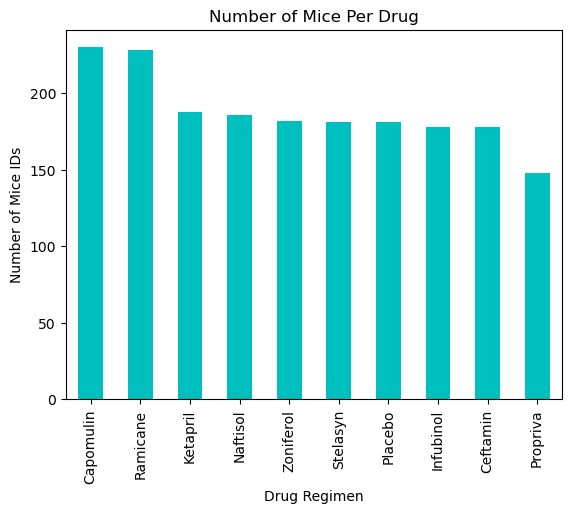

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

pandas_bar_chart = plot_pandas = per_drug_mice_count.plot.bar(color='c')

plt.title("Number of Mice Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice IDs")

pandas_bar_chart

<BarContainer object of 10 artists>

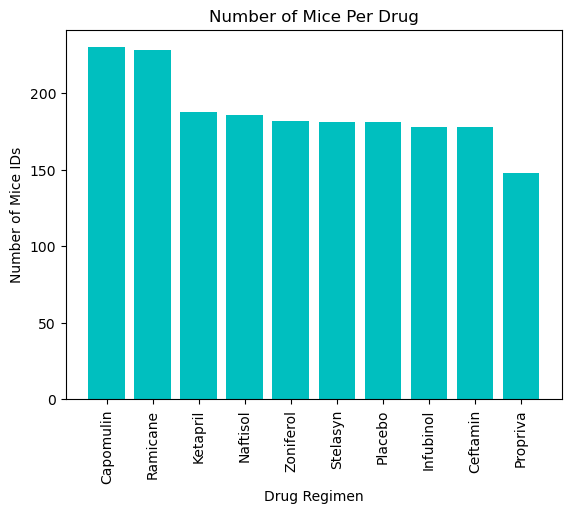

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = per_drug_mice_count.index.values
y_axis = per_drug_mice_count

py_bar_chart = plt.bar(x_axis, y_axis, color='c', alpha =1, align='center')

plt.title("Number of Mice Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice IDs")
plt.xticks(rotation="vertical")


py_bar_chart

<Axes: title={'center': 'Male and Female Mice Breakdown'}, ylabel='Sex'>

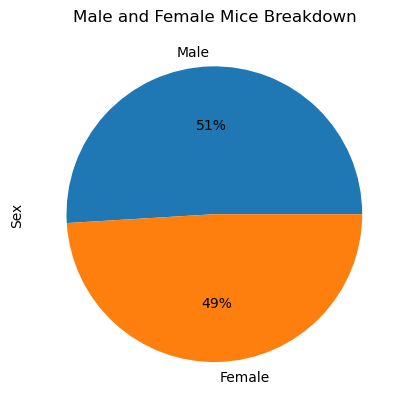

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = clean_combined_df['Sex'].value_counts()

gender_pie_chart = mice_gender.plot.pie(autopct="%.f%%")
plt.title("Male and Female Mice Breakdown")

gender_pie_chart 

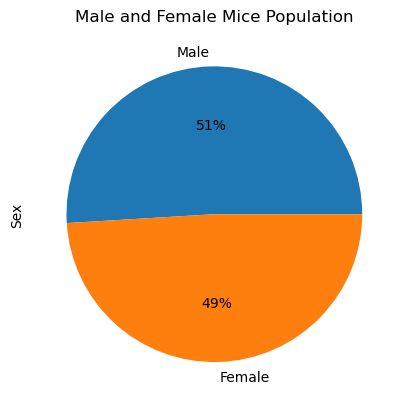

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

py_gender_pie_chart = mice_gender.plot.pie(y='Total Count', autopct="%.f%%")

labels = ['Male', 'Female']
plt.title('Male and Female Mice Population')
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_combined_df['Tumor Volume (mm3)'].groupby(clean_combined_df['Drug Regimen']).mean()
median = clean_combined_df['Tumor Volume (mm3)'].groupby(clean_combined_df['Drug Regimen']).median()
var = clean_combined_df['Tumor Volume (mm3)'].groupby(clean_combined_df['Drug Regimen']).var()
std = clean_combined_df['Tumor Volume (mm3)'].groupby(clean_combined_df['Drug Regimen']).std()
sem = clean_combined_df['Tumor Volume (mm3)'].groupby(clean_combined_df['Drug Regimen']).sem()

summary_statistics = pd.DataFrame ({"Mean Tumor Volume" : mean,
                                   "Median Tumor Volume": median,
                                   "Tumor Volume Variance": var,
                                   "Tumor Volume Standard Dev.": std,
                                   "Tumor Volume Standard Err.": sem})

# Assemble the resulting series into a single summary DataFrame.

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Dev.,Tumor Volume Standard Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_combined_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_last_tp = last_timepoint.merge(clean_combined_df, on=["Mouse ID", "Timepoint"], how="left")
merge_last_tp

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [38]:
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs = clean_combined_df[clean_combined_df["Drug Regimen"].isin(drug_regimens)]

drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [52]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_total_vol = [] 

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merge_last_tp.loc[merge_last_tp["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_total_vol.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerquart = quartiles[.25].round(1)
    upperquart = quartiles[.75].round(1)
    iqr = round(upperquart - lowerquart, 2)
    lower_bound = round(lowerquart - (1.5 * iqr), 2)
    upper_bound = round(upperquart + (1.5 * iqr), 2)

    
    lower_bound = lowerquart - (1.5*iqr)
    upper_bound = upperquart + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")
 
    


For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


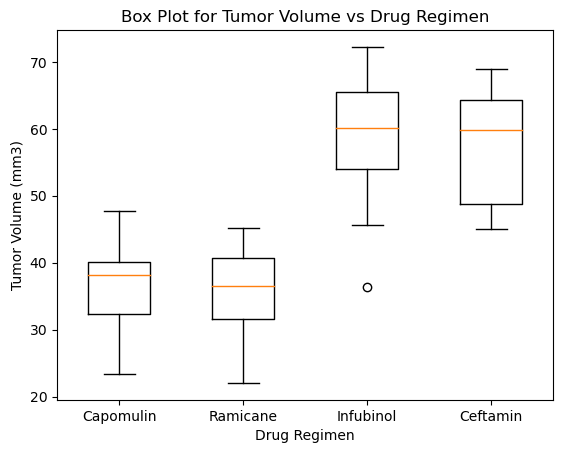

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot for Tumor Volume vs Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_total_vol, labels=drug_regimens, widths = 0.5)

plt.show()


## Line and Scatter Plots

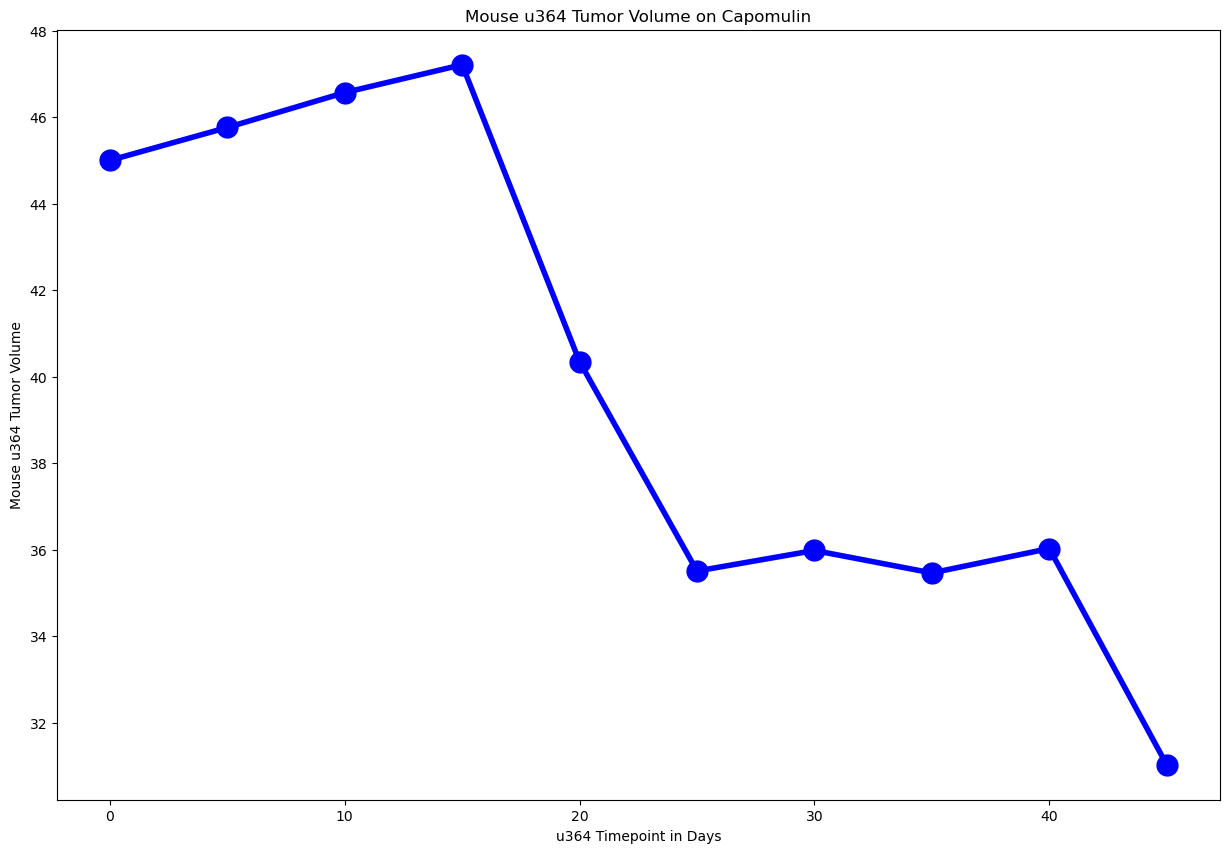

In [68]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_chart_df = clean_combined_df.loc[clean_combined_df['Drug Regimen']=='Capomulin',:]
mouse_on_capomulin = capomulin_chart_df.loc[capomulin_chart_df['Mouse ID']=="u364",:]


x_axis = mouse_on_capomulin["Timepoint"]
total_tumor_vol = mouse_on_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title("Mouse u364 Tumor Volume on Capomulin")
plt.plot(x_axis, total_tumor_vol, linewidth=4, markersize=15, marker="o", color="blue", label="mm3")
plt.xlabel("u364 Timepoint in Days")
plt.ylabel("Mouse u364 Tumor Volume")

plt.show()

/var/folders/p2/2sz238yx2tjcxrfl2qyhd9980000gn/T/ipykernel_10278/129906403.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_capomulin = capomulin_chart_df.groupby(['Mouse ID']).mean()


<function matplotlib.pyplot.show(close=None, block=None)>

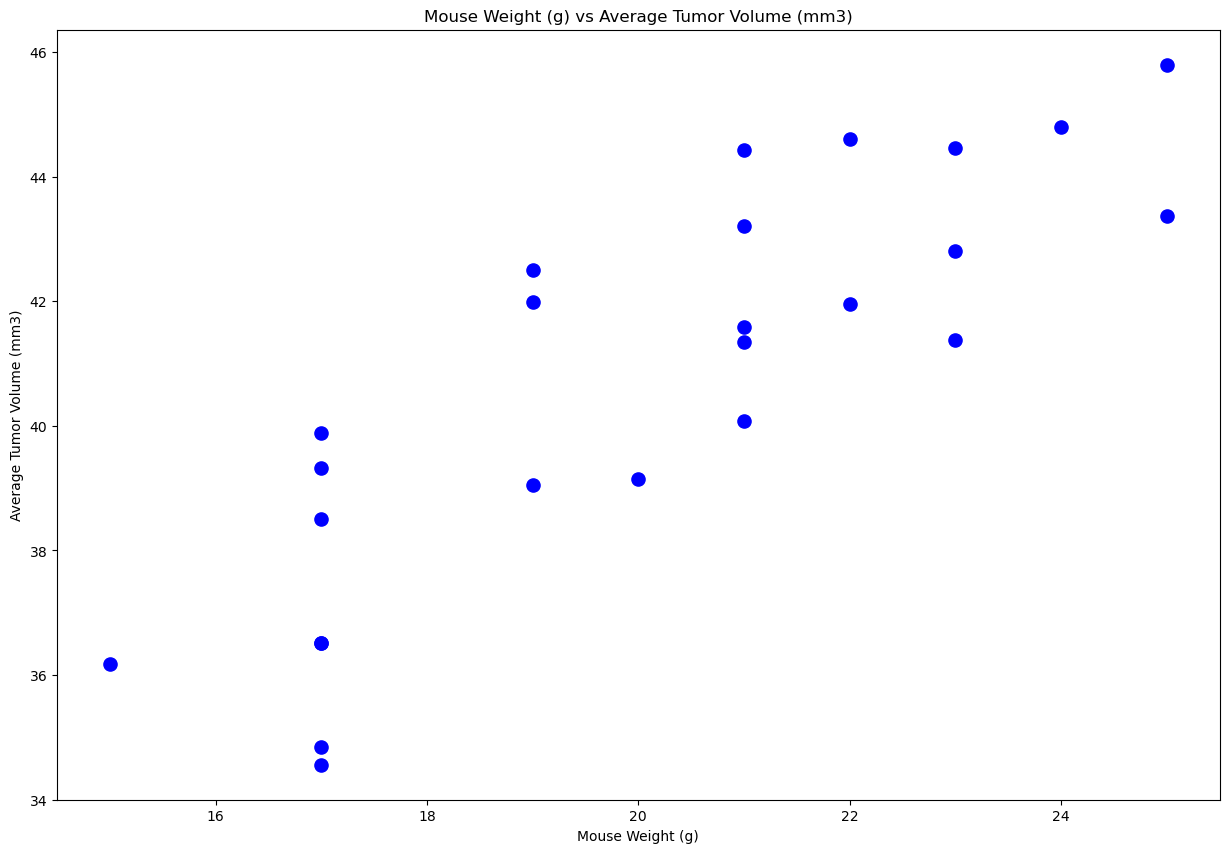

In [78]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_capomulin = capomulin_chart_df.groupby(['Mouse ID']).mean()

fig1, ax1 = plt.subplots(figsize=(15, 10))
marker_size=12

plt.scatter(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'], s=90, color="blue")

plt.title("Mouse Weight (g) vs Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
average_capomulin
plt.show


In [67]:
capomulin_chart_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


## Correlation and Regression

This data shows a correlation of 0.84 between mouse weight and the average tumor volume.


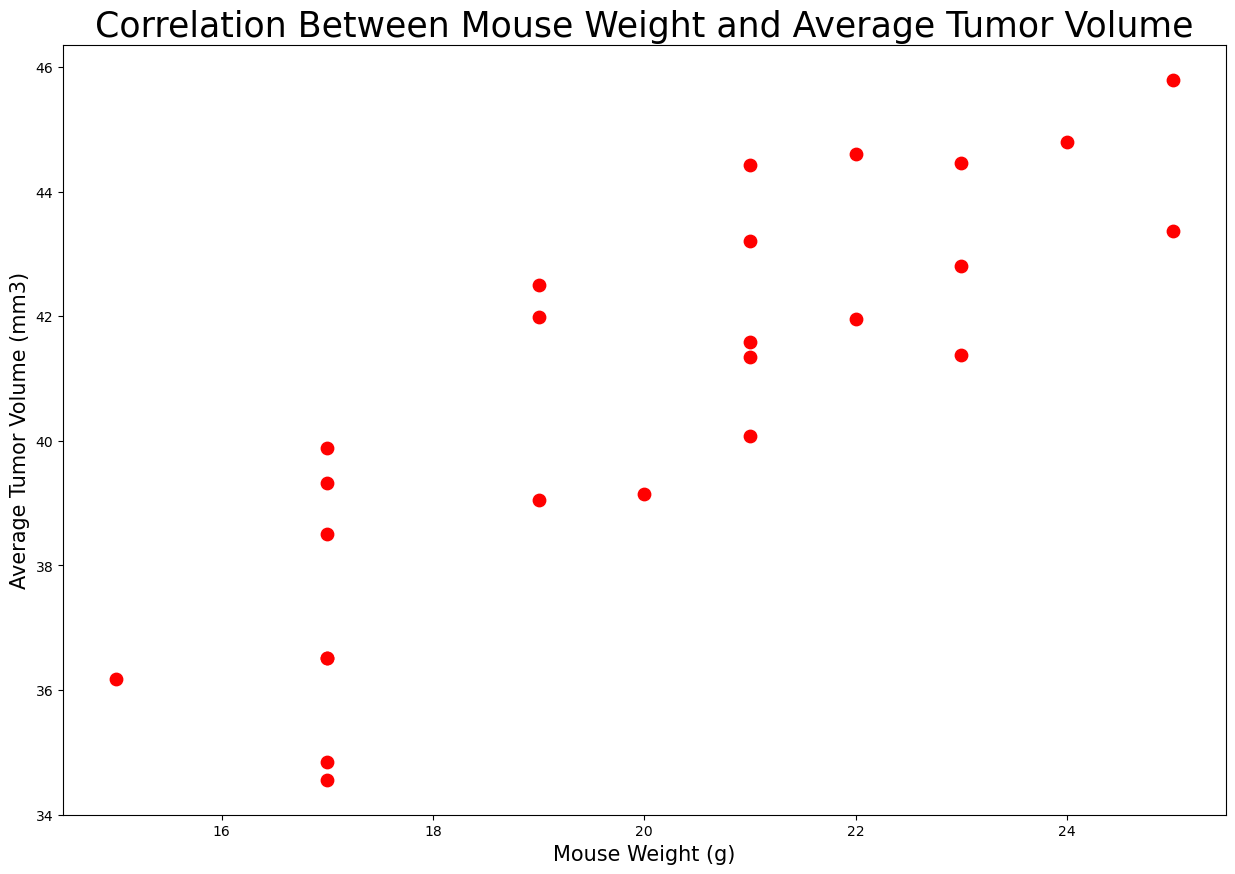

In [85]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'], s=80, color="red")
plt.title("Correlation Between Mouse Weight and Average Tumor Volume", fontsize=25)
plt.xlabel("Mouse Weight (g)", fontsize=15)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=15)



mw_capomulin_correlation = round(st.pearsonr(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'])[0],2)
print(f"This data shows a correlation of {mw_capomulin_correlation} between mouse weight and the average tumor volume.")